# Decision Tree. Classification. Part 1

---

## Trees based algorithms: Decision Tree, Random Forest, Gradient Boosting


Applied Mathematical Modeling in Banking

---

У даній частині навчального процесу потрібно побудувати маматичні моделі класифікації клієнтів на основі алгоритму дерева рішень та перевірити їх на тестовій вибірці.

# 1. Dataset description

**Abstract**

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).



**Data Set Information:**

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:
1. bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2. bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3. bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4. bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (`yes/no`) a term deposit (variable `y`).

**Attribute Information**


**Input variables: bank client data:**

|No|Title|Description|Data Type|Values|
|---|---|---|---|---|
|1|`age`||numeric||
|2|`job`|type of job|categorical|'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown'|
|3|`marital`| marital status |categorical| 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed|
|4|`education`| |categorical| 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown'|
|5|`default`| has credit in default? |categorical| 'no','yes','unknown'|
|6|`housing`| has housing loan? |categorical| 'no','yes','unknown'|
|7|`loan`| has personal loan? |categorical| 'no','yes','unknown'|


**Input variables: related with the last contact of the current campaign:**

|No|Title|Description|Data Type|Values|
|---|---|---|---|---|
|8| contact| contact communication type |categorical| 'cellular','telephone'|
|9 | month| last contact month of year |categorical| 'jan', 'feb', 'mar', ..., 'nov', 'dec'|
|10 | day_of_week| last contact day of the week |categorical|'mon','tue','wed','thu','fri'|
|11 | duration| last contact duration, in seconds |numeric||. 

`duration` - **_Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this 
input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model._**

**Input variables: other attributes:**

|No|Title|Description|Data Type|Values|
|---|---|---|---|---|
|12 | `campaign`| number of contacts performed during this campaign and for this client |numeric| includes last contact||
|13 | `pdays`|number of days that passed by after the client was last contacted from a previous campaign |numeric| 999 mean client was not previously contacted||
|14 | `previous`| number of contacts performed before this campaign and for this client |numeric||
|15 | `poutcome`| outcome of the previous marketing campaign |categorical| 'failure','nonexistent','success'|

**Input variables: social and economic context attributes**

|No|Title|Description|Data Type|Values|
|---|---|---|---|---|
|16 | `emp.var.rate`| employment variation rate - quarterly indicator |numeric||
|17 | `cons.price.idx`| consumer price index - monthly indicator |numeric||
|18 | `cons.conf.idx`| consumer confidence index - monthly indicator ||numeric||
|19 | `euribor3m`| euribor 3 month rate - daily indicator |numeric||
|20 | `nr.employed`|number of employees - quarterly indicator |numeric||

**Output variable (desired target):**

|No|Title|Description|Data Type|Values|
|---|---|---|---|---|
|21| `y` | has the client subscribed a term deposit? |binary| 'yes','no'|

Source: https://archive.ics.uci.edu/ml/datasets/bank+marketing


---

# 2. Data load and preview

Для початку завантажимо дані у змінну `data`:

In [65]:
data <- read.csv("data/banking.csv", 
                 na.strings = c("", " ", "NA", "NULL"), # fix missing as NA if present
                 stringsAsFactors = TRUE) # set strings as factor, we need this for some algorithms
#use + unknown with na.strings if you want to play with missing
#data <- read.csv("data/banking.csv", na.strings = c("", " ", "NA", "NULL", "unknown"))

Переглянемо структуру вибірки даних з `str()`:

In [2]:
str(data)

'data.frame':	11162 obs. of  17 variables:
 $ age      : int  59 56 41 55 54 42 56 60 37 28 ...
 $ job      : chr  "admin." "admin." "technician" "services" ...
 $ marital  : chr  "married" "married" "married" "married" ...
 $ education: chr  "secondary" "secondary" "secondary" "secondary" ...
 $ default  : chr  "no" "no" "no" "no" ...
 $ balance  : int  2343 45 1270 2476 184 0 830 545 1 5090 ...
 $ housing  : chr  "yes" "no" "yes" "yes" ...
 $ loan     : chr  "no" "no" "no" "no" ...
 $ contact  : chr  "unknown" "unknown" "unknown" "unknown" ...
 $ day      : int  5 5 5 5 5 5 6 6 6 6 ...
 $ month    : chr  "may" "may" "may" "may" ...
 $ duration : int  1042 1467 1389 579 673 562 1201 1030 608 1297 ...
 $ campaign : int  1 1 1 1 2 2 1 1 1 3 ...
 $ pdays    : int  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
 $ previous : int  0 0 0 0 0 0 0 0 0 0 ...
 $ poutcome : chr  "unknown" "unknown" "unknown" "unknown" ...
 $ deposit  : chr  "yes" "yes" "yes" "yes" ...


Переглянемо вигляд перших рядків даних з `head()`:

In [66]:
head(data)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>
1,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
2,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
3,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
4,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
5,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
6,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes


Описова статистика факторів:

In [67]:
summary(data)

      age                 job           marital         education   
 Min.   :18.00   management :2566   divorced:1293   primary  :1500  
 1st Qu.:32.00   blue-collar:1944   married :6351   secondary:5476  
 Median :39.00   technician :1823   single  :3518   tertiary :3689  
 Mean   :41.23   admin.     :1334                   unknown  : 497  
 3rd Qu.:49.00   services   : 923                                   
 Max.   :95.00   retired    : 778                                   
                 (Other)    :1794                                   
 default        balance      housing     loan           contact    
 no :10994   Min.   :-6847   no :5881   no :9702   cellular :8042  
 yes:  168   1st Qu.:  122   yes:5281   yes:1460   telephone: 774  
             Median :  550                         unknown  :2346  
             Mean   : 1529                                         
             3rd Qu.: 1708                                         
             Max.   :81204              

Перевіримо вибірку на наявність пропусків:

 /\     /\
{  `---'  }
{  O   O  }
==>  V <==  No need for mice. This data set is completely observed.
 \  \|/  /
  `-----'



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,
11162,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


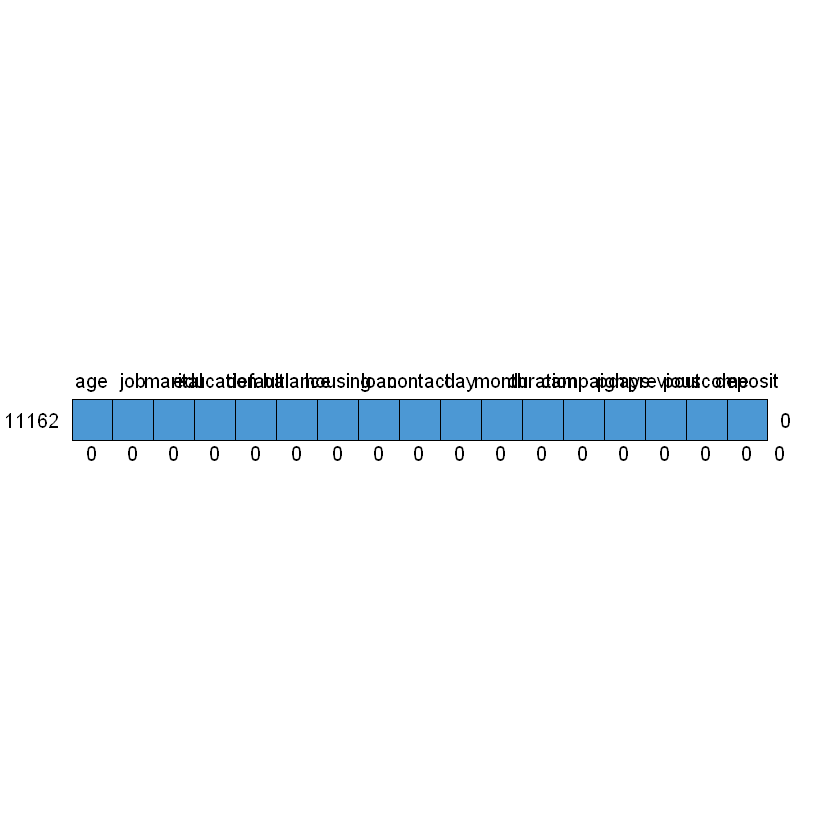

In [68]:
library(mice)
md.pattern(data) # OK

---

# 3. Data visualization

**Вік клієнта (age):**

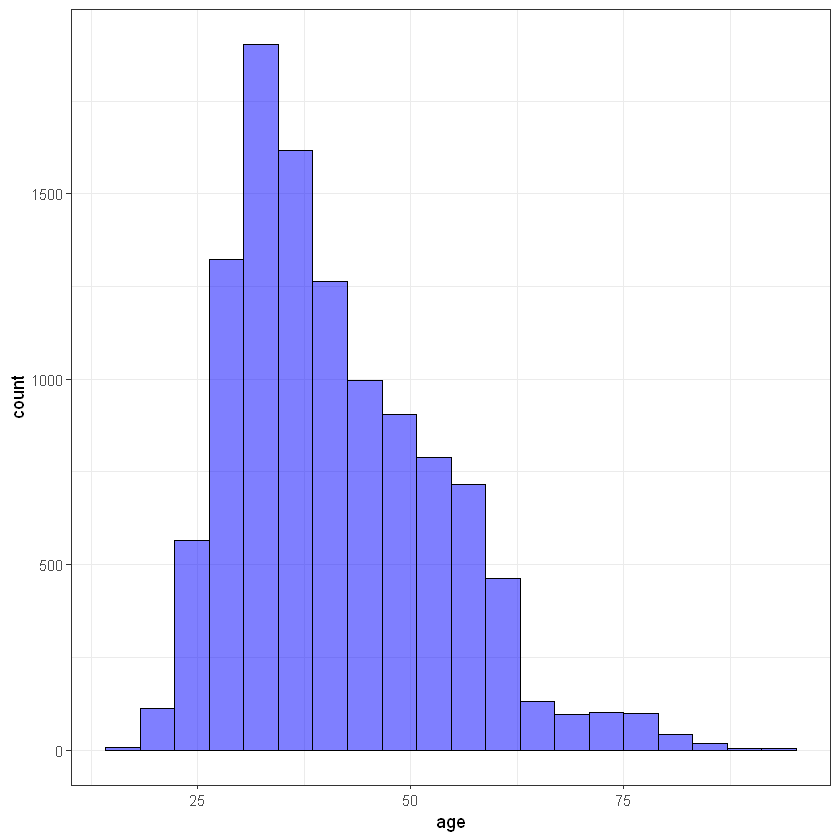

In [69]:
library(ggplot2)

ggplot(data, aes(age)) + 
    geom_histogram(bins = 20, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

**Робота клієнта (job):**

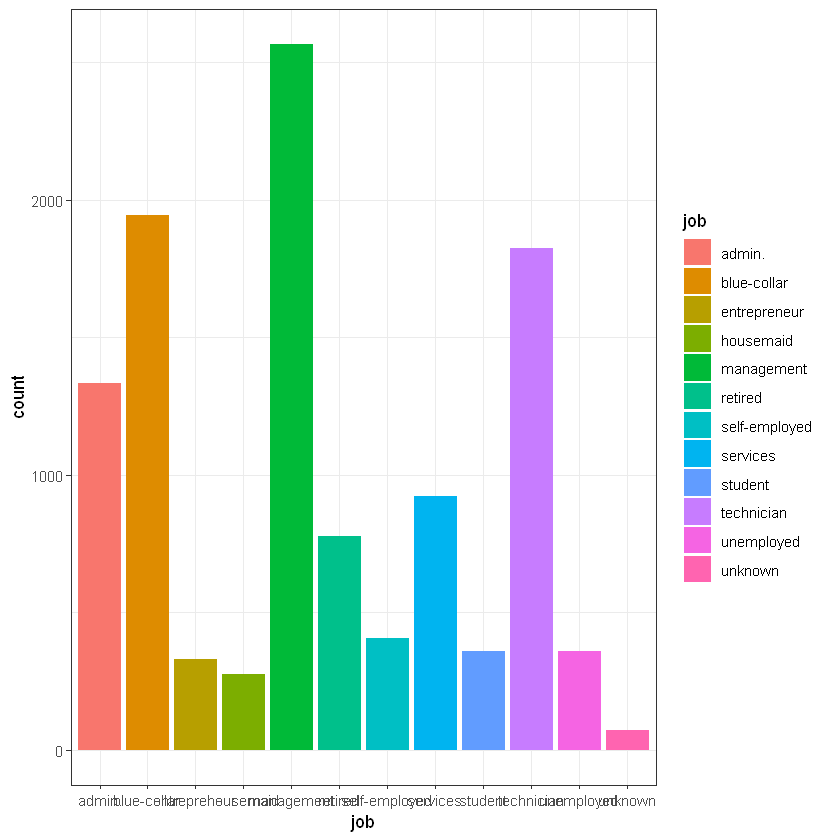

In [70]:
ggplot(data, aes(job)) + 
    geom_bar(aes(fill = job)) + 
    theme_bw()

In [71]:
library(gmodels)
CrossTable(data$job, data$deposit)
# more loyal to deposits are management, retired, student, unemployed ))


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  11162 

 
              | data$deposit 
     data$job |        no |       yes | Row Total | 
--------------|-----------|-----------|-----------|
       admin. |       703 |       631 |      1334 | 
              |     0.002 |     0.002 |           | 
              |     0.527 |     0.473 |     0.120 | 
              |     0.120 |     0.119 |           | 
              |     0.063 |     0.057 |           | 
--------------|-----------|-----------|-----------|
  blue-collar |      1236 |       708 |      1944 | 
              |    44.415 |    49.320 |           | 
              |     0.636 |     0.364 |     0.174 | 
              |     0.210 |     0.134 |           | 
              |     0.111 |     0.063 |           | 
--------------|---------

**Сімейний статус (marital):**

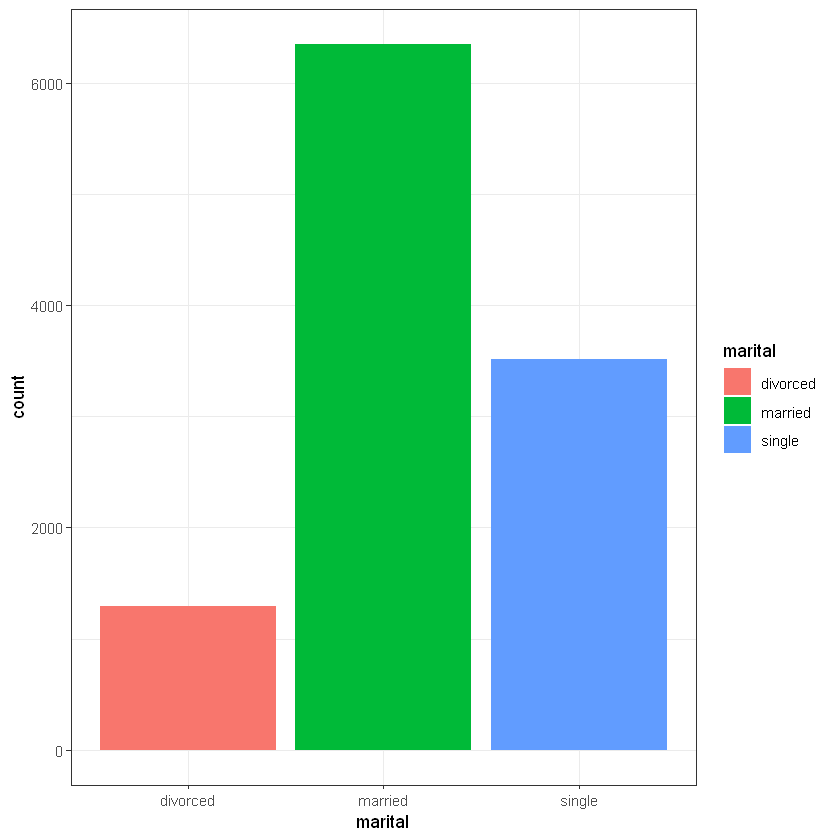

In [72]:
ggplot(data, aes(marital)) + 
    geom_bar(aes(fill = marital)) + 
    theme_bw()

In [73]:
CrossTable(data$marital, data$deposit)
# married are not very loyal to deposits
# but singles is more loyal


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  11162 

 
             | data$deposit 
data$marital |        no |       yes | Row Total | 
-------------|-----------|-----------|-----------|
    divorced |       671 |       622 |      1293 | 
             |     0.128 |     0.142 |           | 
             |     0.519 |     0.481 |     0.116 | 
             |     0.114 |     0.118 |           | 
             |     0.060 |     0.056 |           | 
-------------|-----------|-----------|-----------|
     married |      3596 |      2755 |      6351 | 
             |    19.361 |    21.499 |           | 
             |     0.566 |     0.434 |     0.569 | 
             |     0.612 |     0.521 |           | 
             |     0.322 |     0.247 |           | 
-------------|-----------|-----------|

**Освіта (education):**

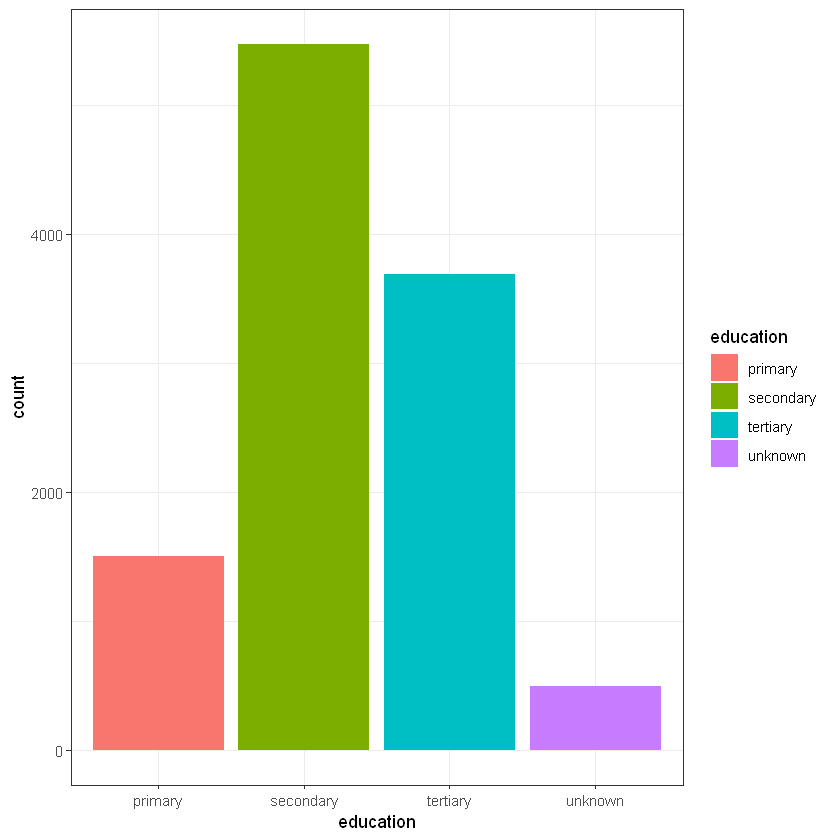

In [74]:
ggplot(data, aes(education)) + 
    geom_bar(aes(fill = education)) + 
    theme_bw()

In [75]:
CrossTable(data$education, data$deposit)
# people with tertiary education is more loyal than other groups


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  11162 

 
               | data$deposit 
data$education |        no |       yes | Row Total | 
---------------|-----------|-----------|-----------|
       primary |       909 |       591 |      1500 | 
               |    18.172 |    20.179 |           | 
               |     0.606 |     0.394 |     0.134 | 
               |     0.155 |     0.112 |           | 
               |     0.081 |     0.053 |           | 
---------------|-----------|-----------|-----------|
     secondary |      3026 |      2450 |      5476 | 
               |     7.272 |     8.075 |           | 
               |     0.553 |     0.447 |     0.491 | 
               |     0.515 |     0.463 |           | 
               |     0.271 |     0.219 |           | 
----------

**Дефолт (default):**

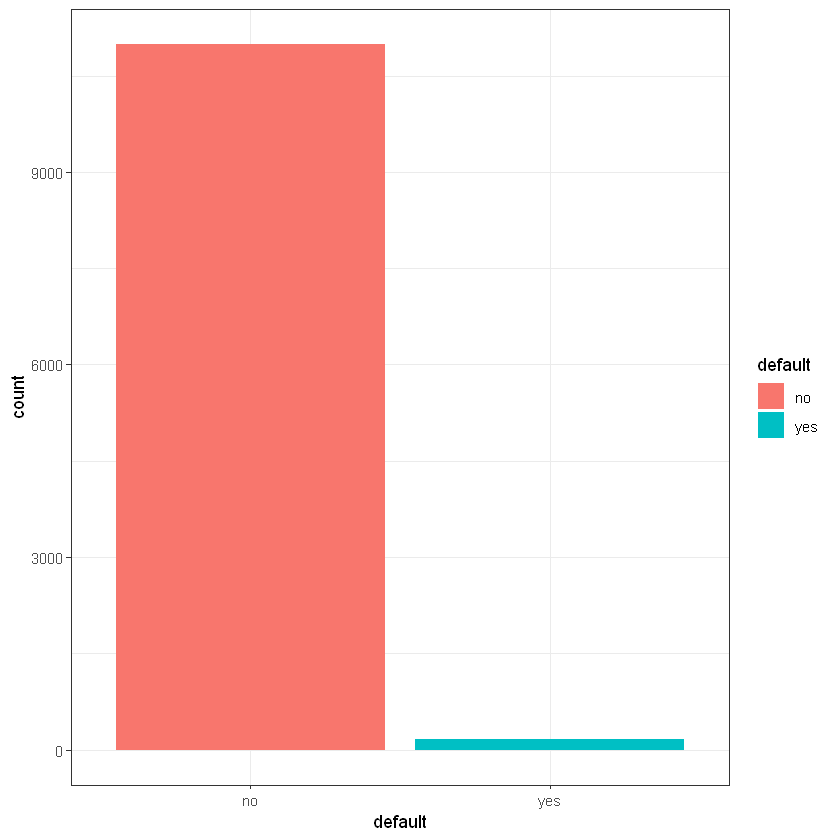

In [76]:
ggplot(data, aes(default)) + 
    geom_bar(aes(fill = default)) + 
    theme_bw()

In [77]:
CrossTable(data$default, data$deposit)
# defaults not very loyal to deposits, but why? ))))))


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  11162 

 
             | data$deposit 
data$default |        no |       yes | Row Total | 
-------------|-----------|-----------|-----------|
          no |      5757 |      5237 |     10994 | 
             |     0.132 |     0.146 |           | 
             |     0.524 |     0.476 |     0.985 | 
             |     0.980 |     0.990 |           | 
             |     0.516 |     0.469 |           | 
-------------|-----------|-----------|-----------|
         yes |       116 |        52 |       168 | 
             |     8.621 |     9.573 |           | 
             |     0.690 |     0.310 |     0.015 | 
             |     0.020 |     0.010 |           | 
             |     0.010 |     0.005 |           | 
-------------|-----------|-----------|

**Баланс (balance):**

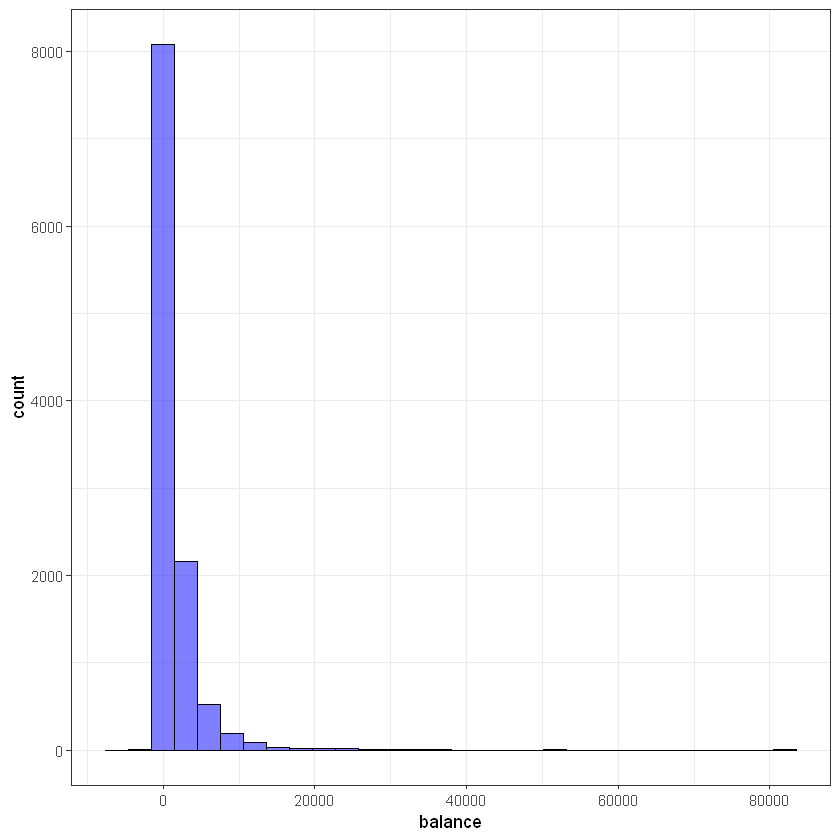

In [78]:
ggplot(data, aes(balance)) + 
    geom_histogram(bins = 30, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

# looks like balance data has outliers

**Наявність кредиту на житло (housing):**

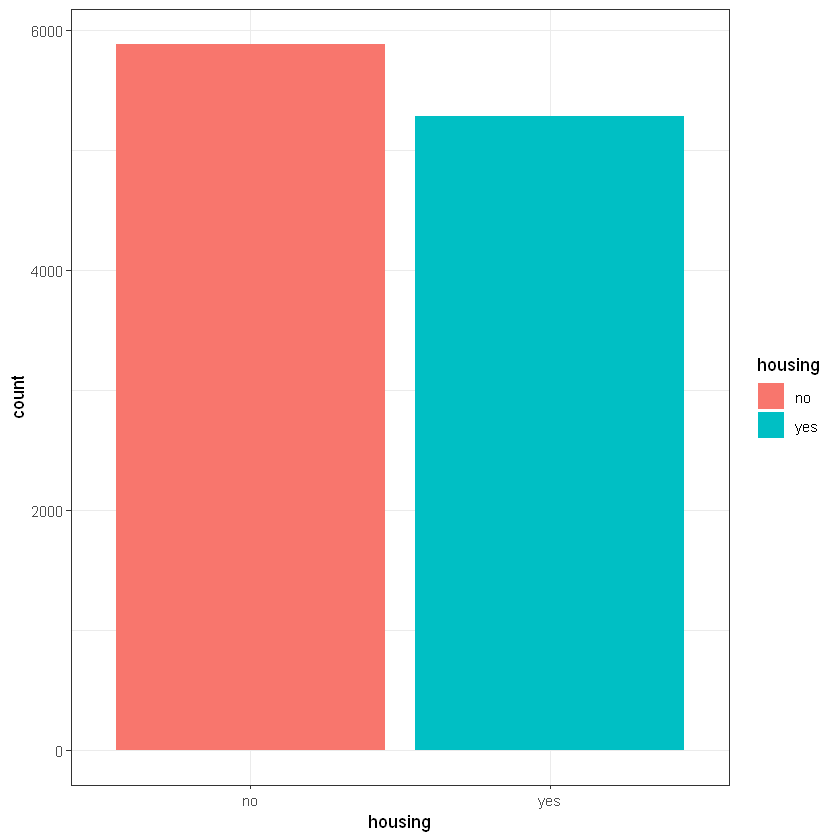

In [79]:
ggplot(data, aes(housing)) + 
    geom_bar(aes(fill = housing)) + 
    theme_bw()

In [80]:
CrossTable(data$housing, data$deposit)
# people without housing load logicaly more often can do deposits


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  11162 

 
             | data$deposit 
data$housing |        no |       yes | Row Total | 
-------------|-----------|-----------|-----------|
          no |      2527 |      3354 |      5881 | 
             |   104.023 |   115.509 |           | 
             |     0.430 |     0.570 |     0.527 | 
             |     0.430 |     0.634 |           | 
             |     0.226 |     0.300 |           | 
-------------|-----------|-----------|-----------|
         yes |      3346 |      1935 |      5281 | 
             |   115.842 |   128.633 |           | 
             |     0.634 |     0.366 |     0.473 | 
             |     0.570 |     0.366 |           | 
             |     0.300 |     0.173 |           | 
-------------|-----------|-----------|

**Наявність позики (loan):**

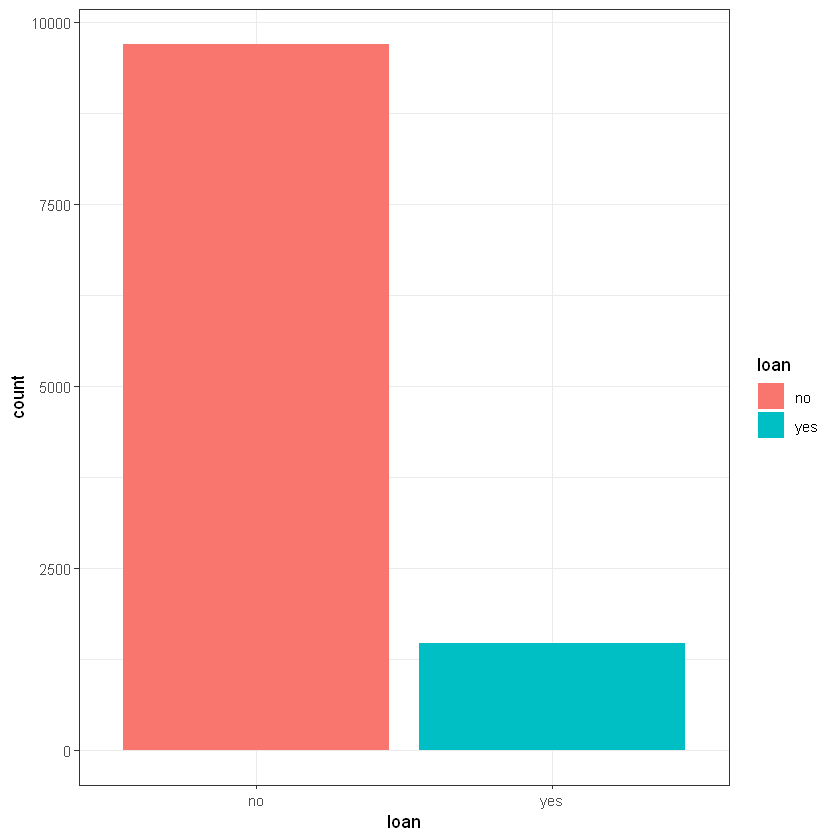

In [81]:
ggplot(data, aes(loan)) + 
    geom_bar(aes(fill = loan)) + 
    theme_bw()

In [82]:
CrossTable(data$loan, data$deposit)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  11162 

 
             | data$deposit 
   data$loan |        no |       yes | Row Total | 
-------------|-----------|-----------|-----------|
          no |      4897 |      4805 |      9702 | 
             |     8.459 |     9.393 |           | 
             |     0.505 |     0.495 |     0.869 | 
             |     0.834 |     0.908 |           | 
             |     0.439 |     0.430 |           | 
-------------|-----------|-----------|-----------|
         yes |       976 |       484 |      1460 | 
             |    56.214 |    62.421 |           | 
             |     0.668 |     0.332 |     0.131 | 
             |     0.166 |     0.092 |           | 
             |     0.087 |     0.043 |           | 
-------------|-----------|-----------|

**# Тип комунікації (contact):**

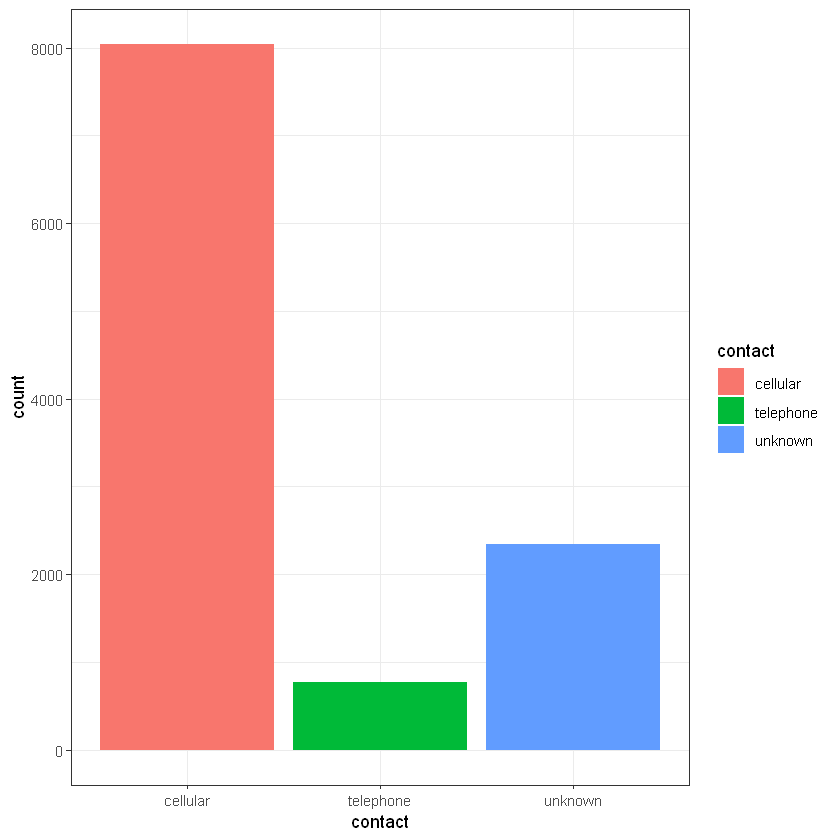

In [83]:
ggplot(data, aes(contact)) + 
    geom_bar(aes(fill = contact)) + 
    theme_bw()

In [84]:
CrossTable(data$contact, data$deposit)
# cellular communication channel looks like the best way to increase deposits count
# people with cellular devices has more money? 


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  11162 

 
             | data$deposit 
data$contact |        no |       yes | Row Total | 
-------------|-----------|-----------|-----------|
    cellular |      3673 |      4369 |      8042 | 
             |    73.685 |    81.821 |           | 
             |     0.457 |     0.543 |     0.720 | 
             |     0.625 |     0.826 |           | 
             |     0.329 |     0.391 |           | 
-------------|-----------|-----------|-----------|
   telephone |       384 |       390 |       774 | 
             |     1.327 |     1.474 |           | 
             |     0.496 |     0.504 |     0.069 | 
             |     0.065 |     0.074 |           | 
             |     0.034 |     0.035 |           | 
-------------|-----------|-----------|

**День місяця (day):**

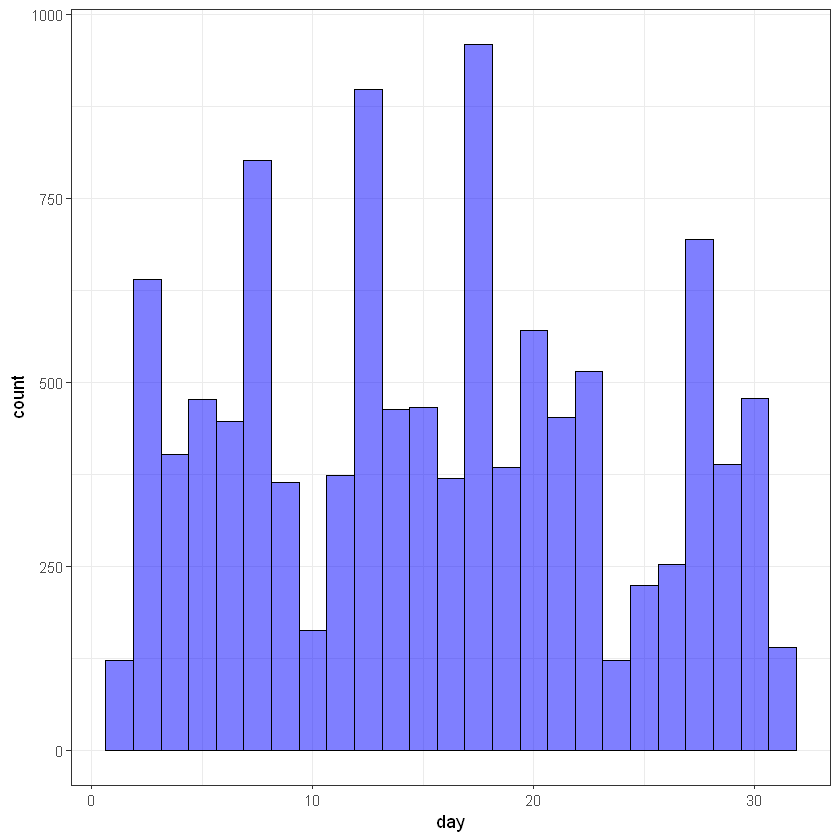

In [85]:
ggplot(data, aes(day)) + 
    geom_histogram(bins = 25, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

**Місяць (month):**

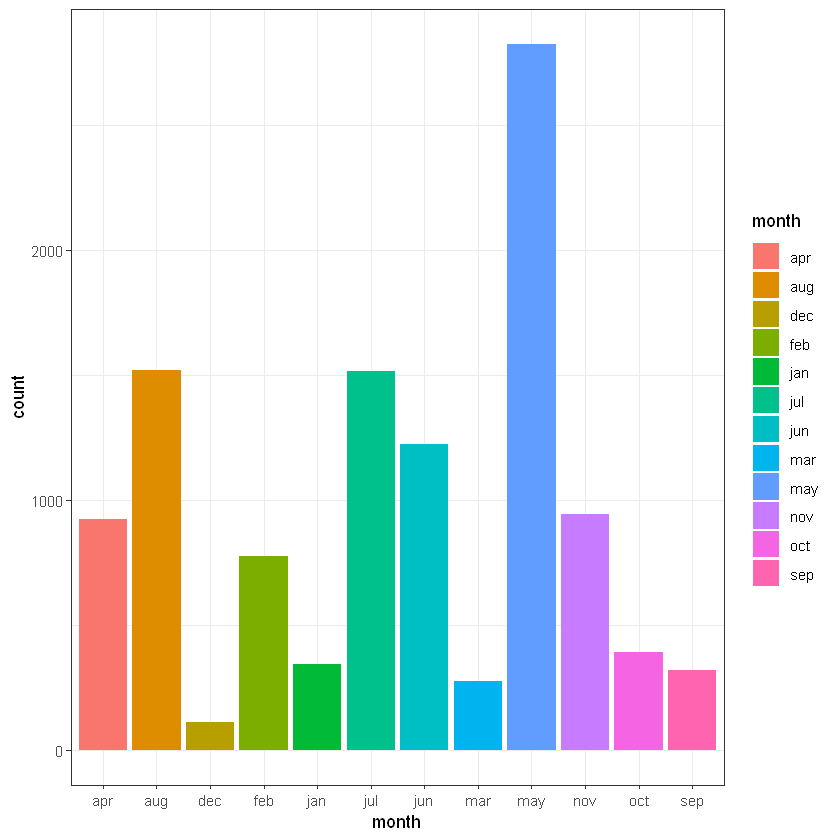

In [86]:
ggplot(data, aes(month)) + 
    geom_bar(aes(fill = month)) + 
    theme_bw()

In [87]:
# So, lets replace our month with ordered factor for correct visualization
library(dplyr)
library(magrittr)
data <- data %>%
    mutate(month = factor(month,levels=c("jan","feb","mar",
               "apr","may","jun","jul","aug","sep",
              "oct","nov","dec"),ordered=TRUE))

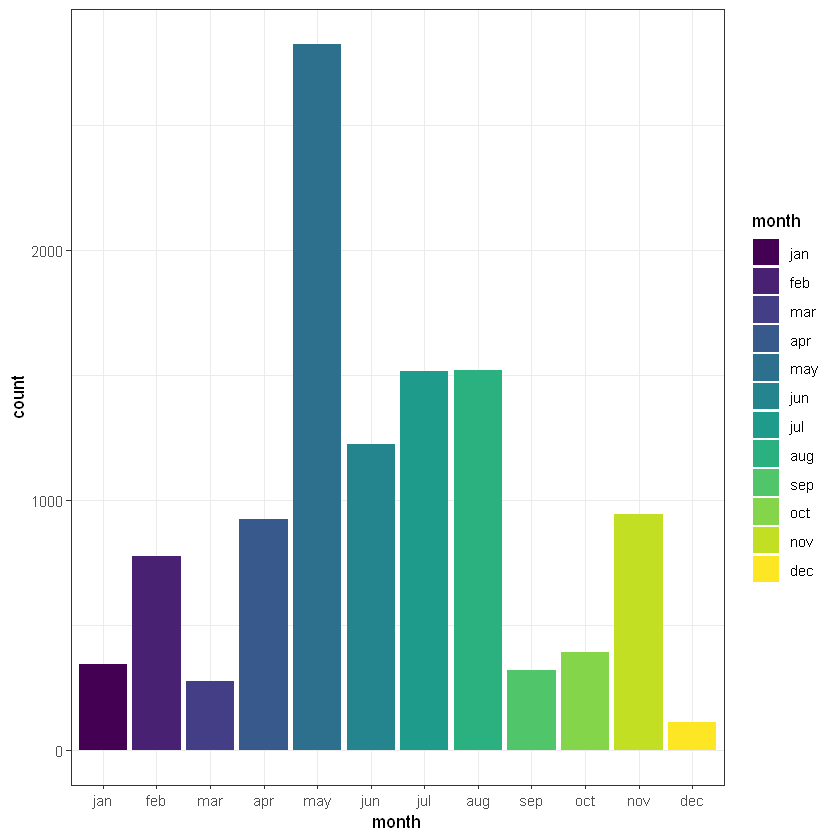

In [25]:
ggplot(data, aes(month)) + 
    geom_bar(aes(fill = month)) + 
    theme_bw()

In [88]:
CrossTable(data$month, data$deposit)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  11162 

 
             | data$deposit 
  data$month |        no |       yes | Row Total | 
-------------|-----------|-----------|-----------|
         jan |       202 |       142 |       344 | 
             |     2.437 |     2.706 |           | 
             |     0.587 |     0.413 |     0.031 | 
             |     0.034 |     0.027 |           | 
             |     0.018 |     0.013 |           | 
-------------|-----------|-----------|-----------|
         feb |       335 |       441 |       776 | 
             |    13.159 |    14.612 |           | 
             |     0.432 |     0.568 |     0.070 | 
             |     0.057 |     0.083 |           | 
             |     0.030 |     0.040 |           | 
-------------|-----------|-----------|

**Тривалість останнього контакту (duration):**

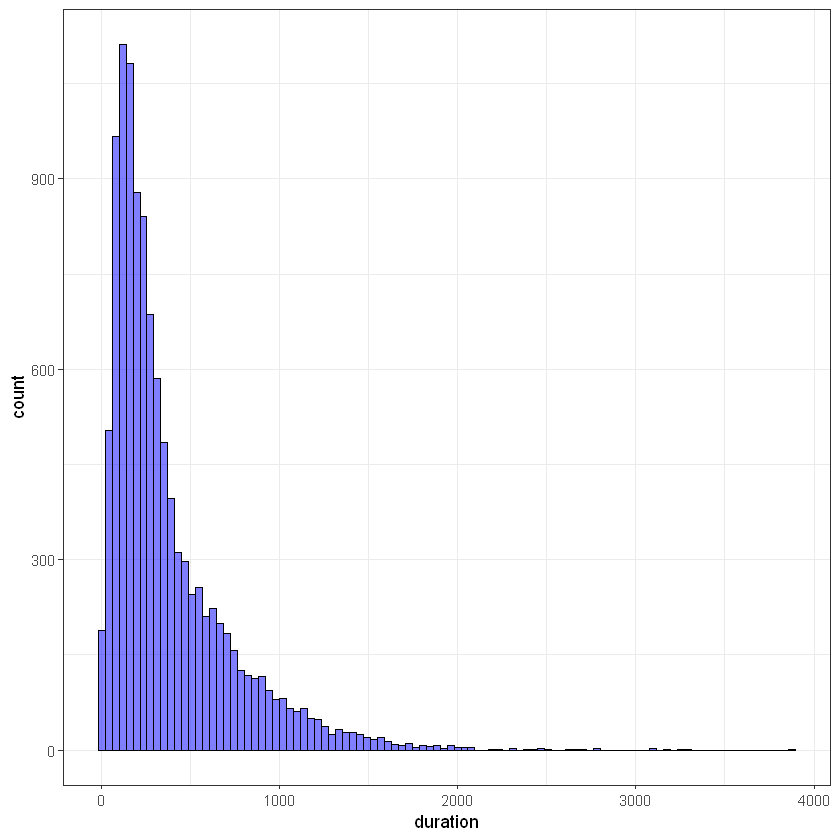

In [89]:
ggplot(data, aes(duration)) + 
    geom_histogram(bins = 100, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

**Кількість контактів протягом поточної кампанії (campaign):**

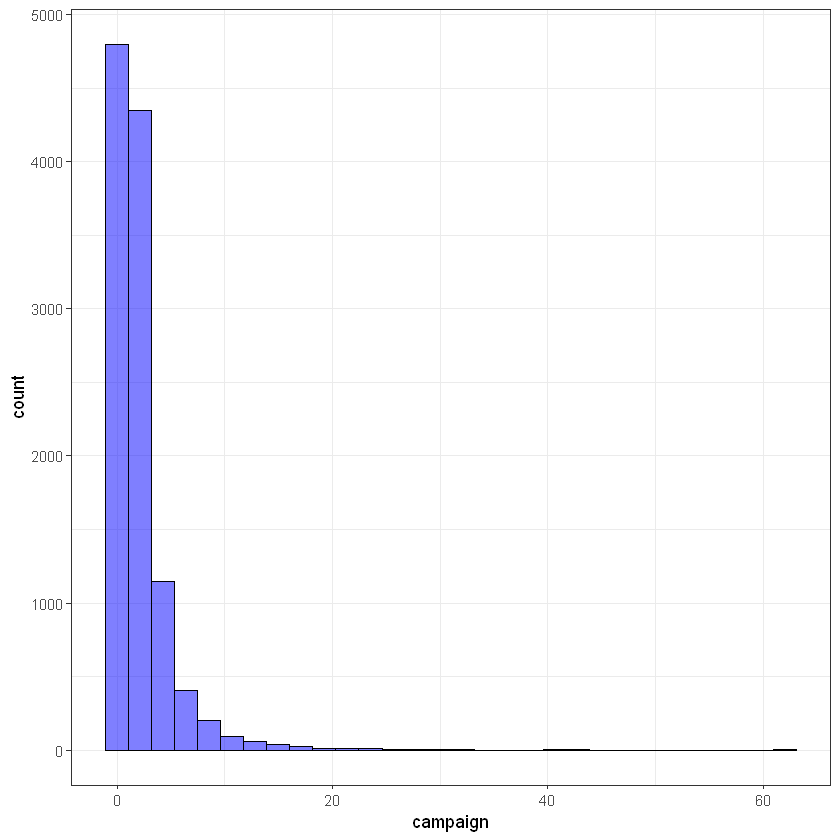

In [90]:
ggplot(data, aes(campaign)) + 
    geom_histogram(bins = 30, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

**Кількість днів від попередньої акції (pday):**

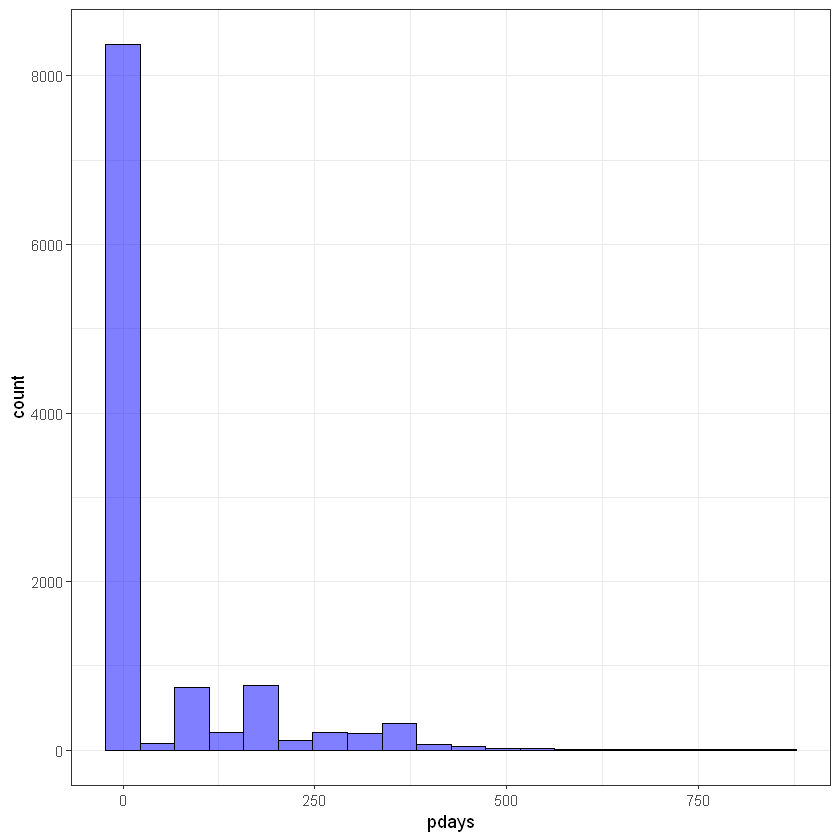

In [29]:
ggplot(data, aes(pdays)) + 
    geom_histogram(bins = 20, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

**Кількість контактів до початку поточної кампанії (previous):**

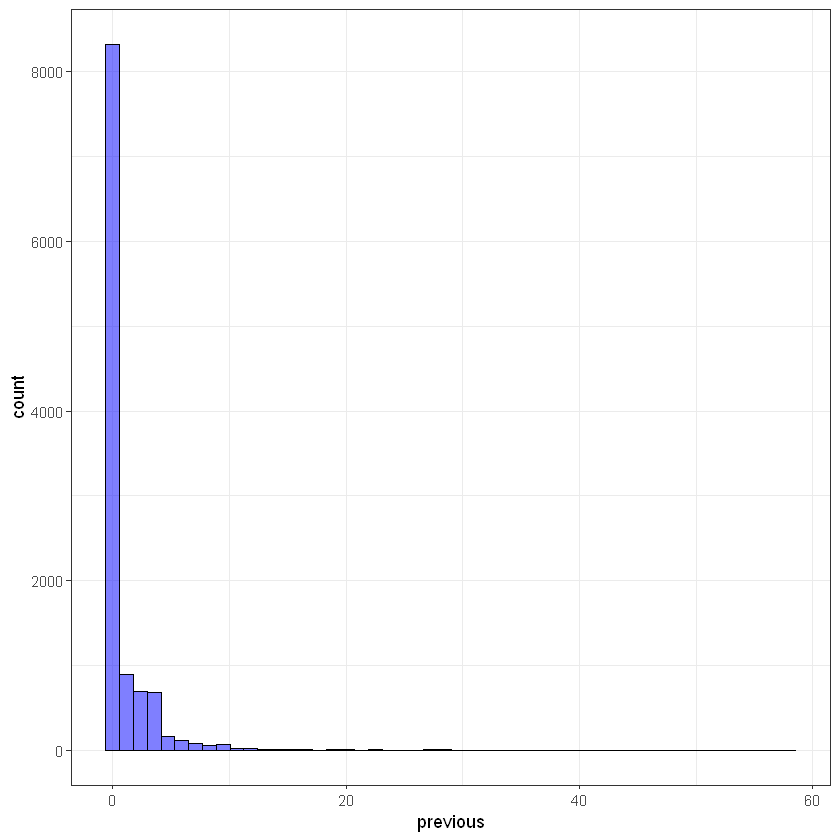

In [91]:
ggplot(data, aes(previous)) + 
    geom_histogram(bins = 50, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

**Результат попередньої кампанії (poutcome):**

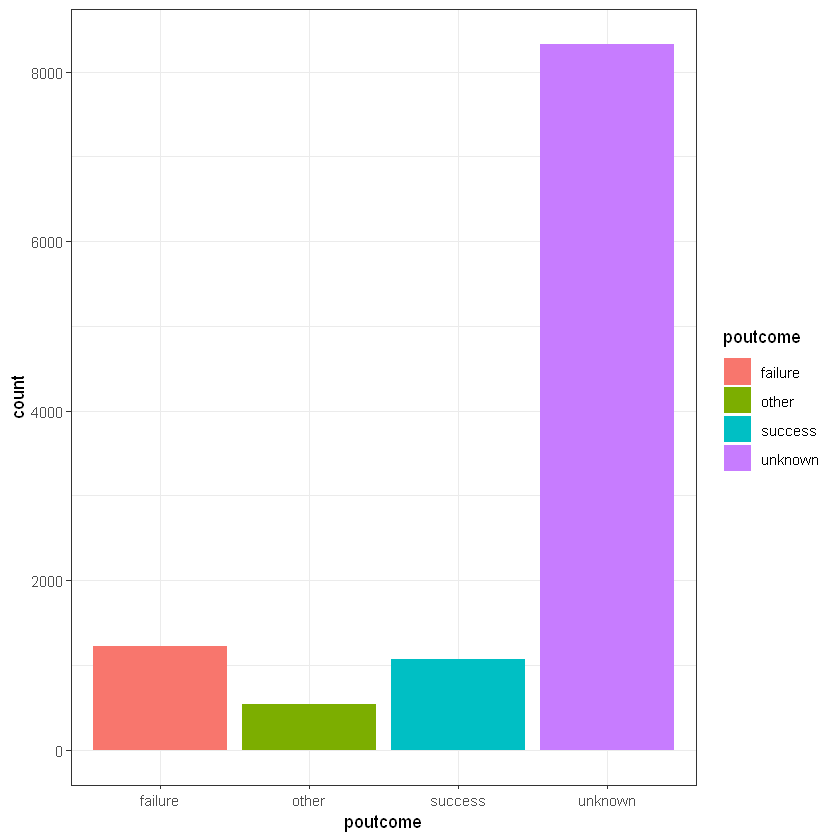

In [92]:
ggplot(data, aes(poutcome)) + 
    geom_bar(aes(fill = poutcome)) + 
    theme_bw()

In [93]:
CrossTable(data$poutcome, data$deposit)
# people with previous success status also loyal for new propositions


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  11162 

 
              | data$deposit 
data$poutcome |        no |       yes | Row Total | 
--------------|-----------|-----------|-----------|
      failure |       610 |       618 |      1228 | 
              |     2.020 |     2.243 |           | 
              |     0.497 |     0.503 |     0.110 | 
              |     0.104 |     0.117 |           | 
              |     0.055 |     0.055 |           | 
--------------|-----------|-----------|-----------|
        other |       230 |       307 |       537 | 
              |     9.773 |    10.852 |           | 
              |     0.428 |     0.572 |     0.048 | 
              |     0.039 |     0.058 |           | 
              |     0.021 |     0.028 |           | 
--------------|---------

**Результат укладання або відсутність укладання договору (deposit):**

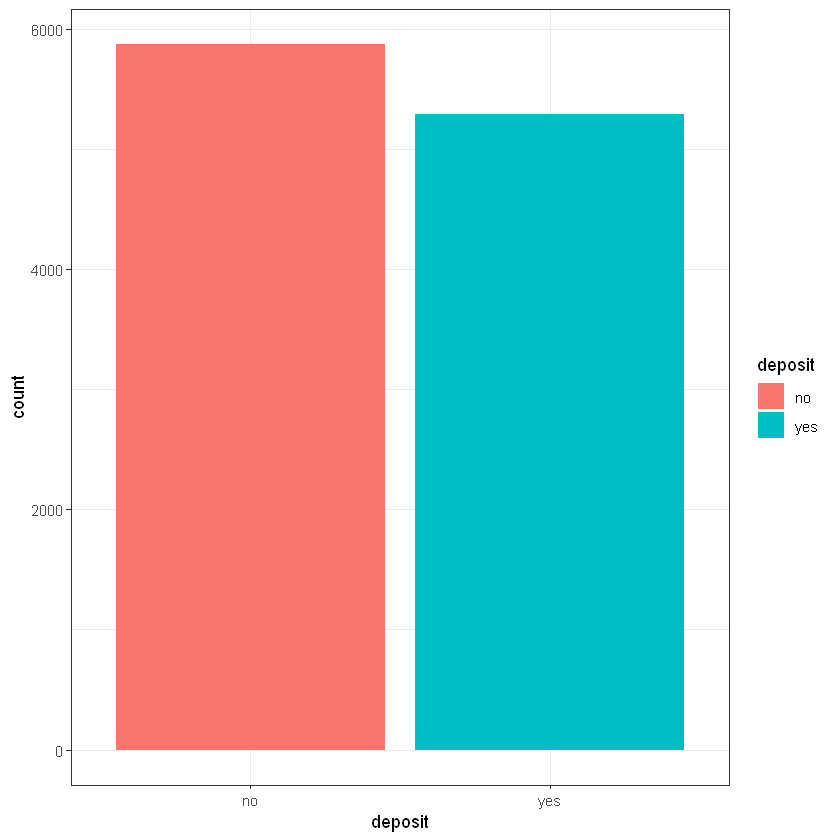

In [94]:
ggplot(data, aes(deposit)) + 
    geom_bar(aes(fill = deposit)) + 
    theme_bw()

In [95]:
CrossTable(data$deposit)


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  11162 

 
          |        no |       yes | 
          |-----------|-----------|
          |      5873 |      5289 | 
          |     0.526 |     0.474 | 
          |-----------|-----------|



 


# 4. Data preprocessing

Перетворимо значення `deposit` до `0` і `1`:

In [96]:
data$deposit <- ifelse(data$deposit == "yes", 1, 0)

Видалимо `duration`, адже цей параметр чітко вказує на факт укладання угоди, такі дані називаються leak:

In [97]:
data$duration <- NULL

Створимо новий параметр `pdays_flag`, який вказує чи був контакт з клієнтом раніше:

In [98]:
data$pdays_flag <- ifelse(data$pdays > 0, 1, 0)

In [99]:
head(data)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit,pdays_flag
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<ord>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>
1,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown,1,0
2,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,-1,0,unknown,1,0
3,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown,1,0
4,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown,1,0
5,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,-1,0,unknown,1,0
6,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,2,-1,0,unknown,1,0


Створимо новий параметр `poutcoume_success`, який вказує чи була попередня кампанія з цим клієнтом “успішною для банку”:

In [100]:
data$poutcoume_success <- ifelse(data$poutcome == "success", 1, 0)

---

# 5. Train/test split

Задаємо seed для генератора випадкових чисел

In [101]:
set.seed(11062021)
library(caret)

Train  65%, test 35%

In [102]:
index = createDataPartition(data$deposit, p = 0.65, list = FALSE)
train_data = data[index, ]
test_data = data[-index, ]

In [103]:
CrossTable(train_data$deposit)
CrossTable(test_data$deposit)


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  7256 

 
          |         0 |         1 | 
          |-----------|-----------|
          |      3835 |      3421 | 
          |     0.529 |     0.471 | 
          |-----------|-----------|



 

 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  3906 

 
          |         0 |         1 | 
          |-----------|-----------|
          |      2038 |      1868 | 
          |     0.522 |     0.478 | 
          |-----------|-----------|



 


---

# 6. Decision trees with `rpart()`

Для побудови дерев рішень у `R` є ряд пакетів та алгоритмів. Розглянемо пакет `rpart`.

In [104]:
#install.packages("rpart")
library(rpart)
rpart_model <- rpart(deposit ~ ., train_data)

Виведемо опис моделі:

In [105]:
rpart_model

n= 7256 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 7256 1808.0950 0.4714719  
   2) poutcoume_success< 0.5 6541 1596.0290 0.4225654  
     4) contact=unknown 1526  267.5491 0.2267366 *
     5) contact=cellular,telephone 5015 1252.1530 0.4821535  
      10) housing=yes 2115  505.5527 0.3952719 *
      11) housing=no 2900  718.9917 0.5455172  
        22) balance< 229.5 898  217.3731 0.4109131 *
        23) balance>=229.5 2002  478.0504 0.6058941 *
   3) poutcoume_success>=0.5 715   53.2951 0.9188811 *

Дуже детальний опис:

In [106]:
summary(rpart_model)

Call:
rpart(formula = deposit ~ ., data = train_data)
  n= 7256 

          CP nsplit rel error    xerror        xstd
1 0.08781079      0 1.0000000 1.0003198 0.001345665
2 0.04221431      1 0.9121892 0.9126511 0.005374521
3 0.01526928      2 0.8699749 0.8705891 0.006588857
4 0.01303484      3 0.8547056 0.8584383 0.007160325
5 0.01000000      4 0.8416708 0.8455652 0.007592851

Variable importance
poutcoume_success           contact           housing           balance 
               53                25                 9                 8 
              job             pdays             month          poutcome 
                1                 1                 1                 1 

Node number 1: 7256 observations,    complexity param=0.08781079
  mean=0.4714719, MSE=0.2491861 
  left son=2 (6541 obs) right son=3 (715 obs)
  Primary splits:
      poutcoume_success < 0.5   to the left,  improve=0.08781079, (0 missing)
      poutcome          splits as  LLRL,      improve=0.08781079, (0

Візуалізуємо дерево рішень:

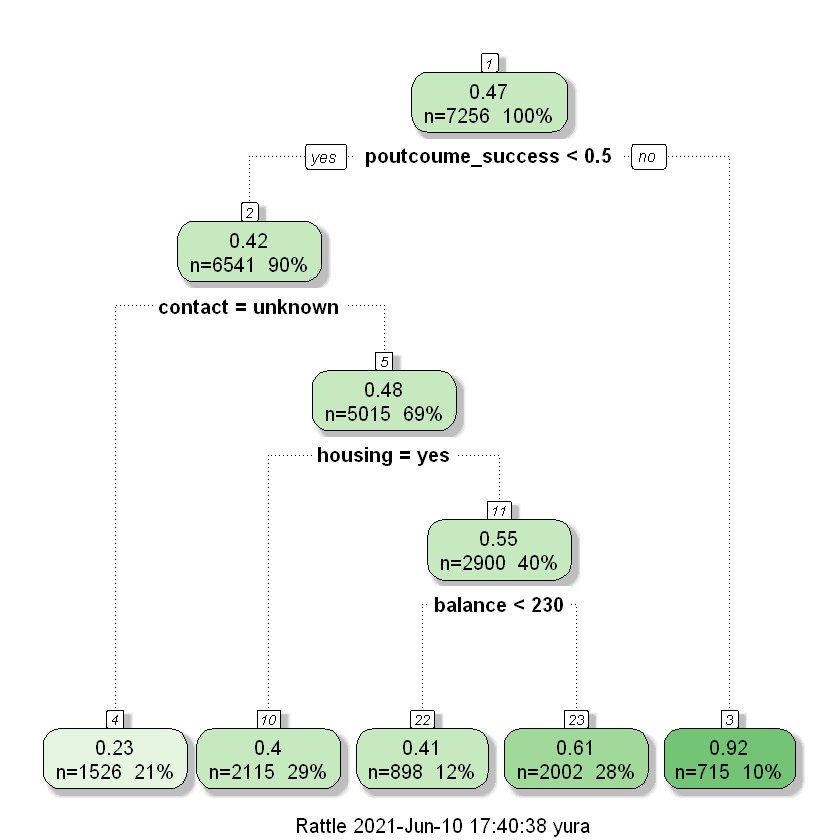

In [107]:
#install.packages(c("rattle", "RColorBrewer"))
library(rattle)
library(RColorBrewer)
fancyRpartPlot(rpart_model)

# now you can see how model model works

Створимо два дата-фрейми для для запису результатів моделювання на тестовій та тренувальній вибірці. Одразу додамо у набори даних реальні значення результатів маркетингової акції deposit та модельовані значення

In [108]:
train_results <- data.frame(No = c(1:nrow(train_data)), 
                            deposit = train_data$deposit, 
                            RPartPredicted = predict(rpart_model, train_data))

test_results <- data.frame(No = c(1:nrow(test_data)),
                           deposit = test_data$deposit, 
                           RPartPredicted = predict(rpart_model, test_data))

head(test_results)

,No,deposit,RPartPredicted
,<int>,<dbl>,<dbl>
3,1,1,0.2267366
5,2,1,0.2267366
7,3,1,0.2267366
11,4,1,0.2267366
13,5,1,0.2267366
14,6,1,0.2267366


Визначимо оптимальну лінію розподілу на 0 і 1 для тренувальної вибірки за допомогою пакету `InformationValue`:

In [109]:
library(InformationValue)
optCutOff <- optimalCutoff(train_results$deposit, train_results$RPartPredicted)
optCutOff

[1] 0.4188811

Побудуємо `ROC`-криву для тестової вибірки:

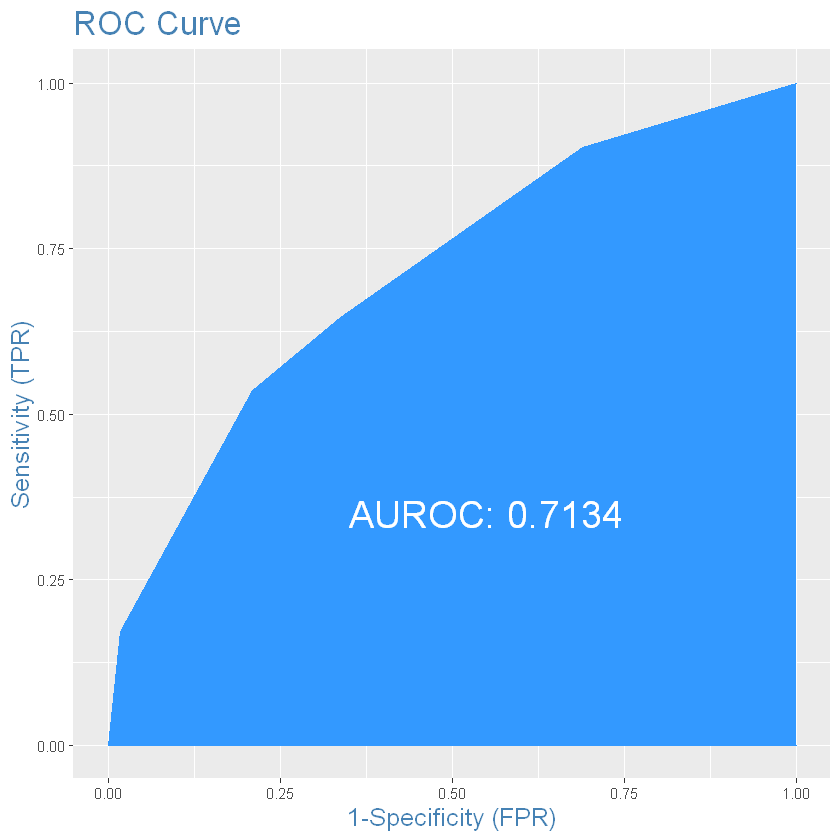

In [110]:
plotROC(test_results$deposit, test_results$RPartPredicted)

Сформуємо набір класів `0` і `1` для тестового набору даних:

In [111]:
test_results$RPartPredicted_Class <- ifelse(test_results$RPartPredicted > optCutOff, 1, 0)

Confusion matrix:

In [112]:
cm <- caret::confusionMatrix(factor(test_results$deposit), 
                      factor(test_results$RPartPredicted_Class), 
                      positive = "1")
cm

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1611  427
         1  867 1001
                                          
               Accuracy : 0.6687          
                 95% CI : (0.6537, 0.6835)
    No Information Rate : 0.6344          
    P-Value [Acc > NIR] : 3.994e-06       
                                          
                  Kappa : 0.3296          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.7010          
            Specificity : 0.6501          
         Pos Pred Value : 0.5359          
         Neg Pred Value : 0.7905          
             Prevalence : 0.3656          
         Detection Rate : 0.2563          
   Detection Prevalence : 0.4782          
      Balanced Accuracy : 0.6756          
                                          
       'Positive' Class : 1               
                        

Переглянемо збалансовану точність класифіції:

In [113]:
BAcc <- cm$byClass[["Balanced Accuracy"]]
BAcc 

[1] 0.6755507

---

# 7. Desicion trees with  PartyKit

Побудуємо дерево рішень за допоомгою пакету `partykit`:

In [115]:
#install.packages("partykit")
library(partykit)
head(train_data)
party_model <- ctree(deposit ~ ., data = train_data)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit,pdays_flag,poutcoume_success
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<ord>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>
1,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown,1,0,0
2,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,-1,0,unknown,1,0,0
4,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown,1,0,0
6,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,2,-1,0,unknown,1,0,0
8,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1,-1,0,unknown,1,0,0
9,37,technician,married,secondary,no,1,yes,no,unknown,6,may,1,-1,0,unknown,1,0,0


Виведемо текстовий опис моделі:

In [118]:
party_model
# Looks like this model is more complex


Model formula:
deposit ~ age + job + marital + education + default + balance + 
    housing + loan + contact + day + month + campaign + pdays + 
    previous + poutcome + pdays_flag + poutcoume_success

Fitted party:
[1] root
|   [2] poutcome in failure, other, unknown
|   |   [3] contact in cellular, telephone
|   |   |   [4] housing in no
|   |   |   |   [5] campaign <= 3
|   |   |   |   |   [6] loan in no
|   |   |   |   |   |   [7] pdays <= 28
|   |   |   |   |   |   |   [8] campaign <= 1
|   |   |   |   |   |   |   |   [9] job in admin., management, retired, services, student, technician: 0.683 (n = 624, err = 135.2)
|   |   |   |   |   |   |   |   [10] job in blue-collar, entrepreneur, housemaid, self-employed, unemployed, unknown: 0.507 (n = 203, err = 50.7)
|   |   |   |   |   |   |   [11] campaign > 1
|   |   |   |   |   |   |   |   [12] day <= 17: 0.577 (n = 444, err = 108.4)
|   |   |   |   |   |   |   |   [13] day > 17
|   |   |   |   |   |   |   |   |   [14] balance <= 20

Візуалізуємо побудоване дерево рішень:

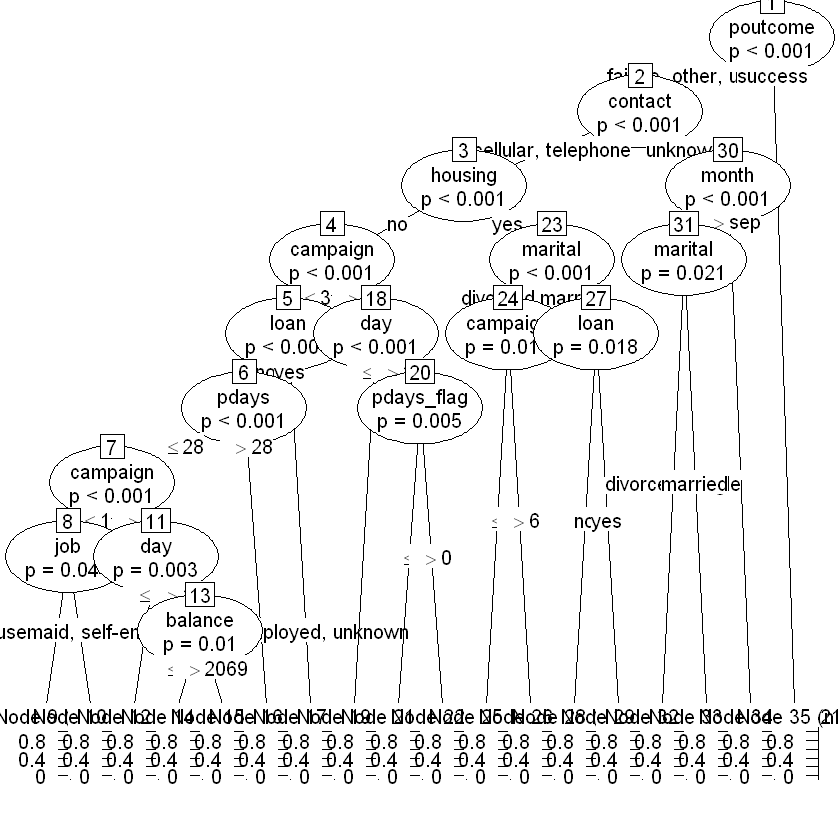

In [120]:
plot(party_model)

Конвернтуємо `ctree()` до `rpart()` для зручної візуалізації:

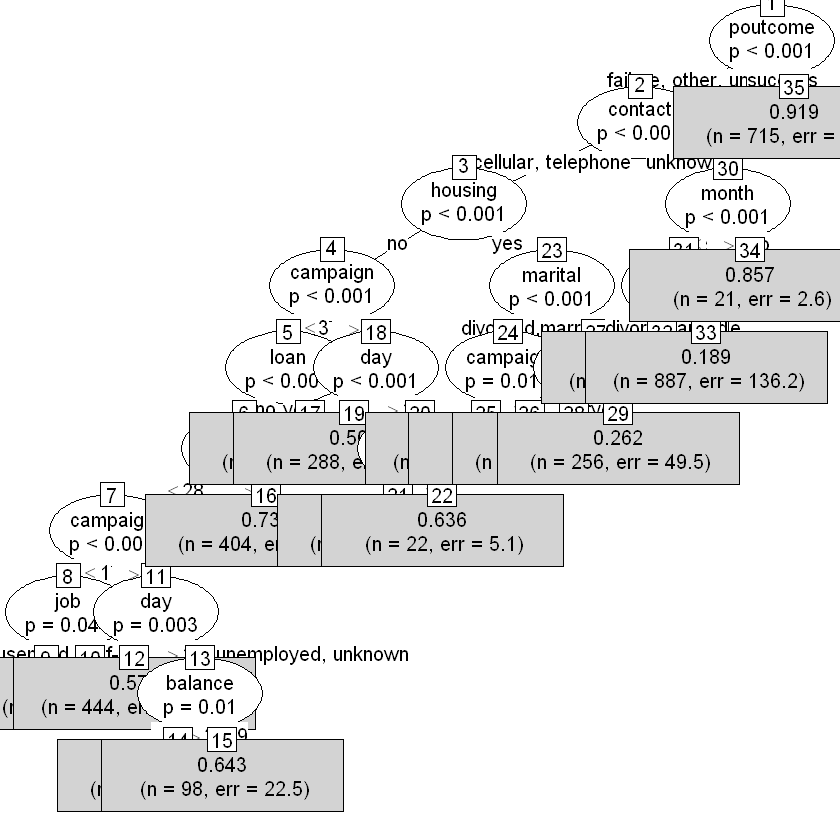

In [122]:
st <- as.simpleparty(party_model)
plot(st)

Додамо прогнозовані показники до раніше створених дата-фрейму для збору результатів:

In [124]:
train_results$PartyPredicted <- predict(party_model, train_data)
test_results$PartyPredicted <- predict(party_model, test_data)
head(test_results)

,No,deposit,RPartPredicted,RPartPredicted_Class,PartyPredicted
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
3,1,1,0.2267366,0,0.1894025
5,2,1,0.2267366,0,0.1894025
7,3,1,0.2267366,0,0.1894025
11,4,1,0.2267366,0,0.2588997
13,5,1,0.2267366,0,0.1894025
14,6,1,0.2267366,0,0.2588997


Визначимо оптимальну лінію розділення на класи 0 і 1:

In [126]:
optCutOff <- optimalCutoff(train_results$deposit, train_results$PartyPredicted)
optCutOff

[1] 0.4788811

ROC-крива та AUROC:

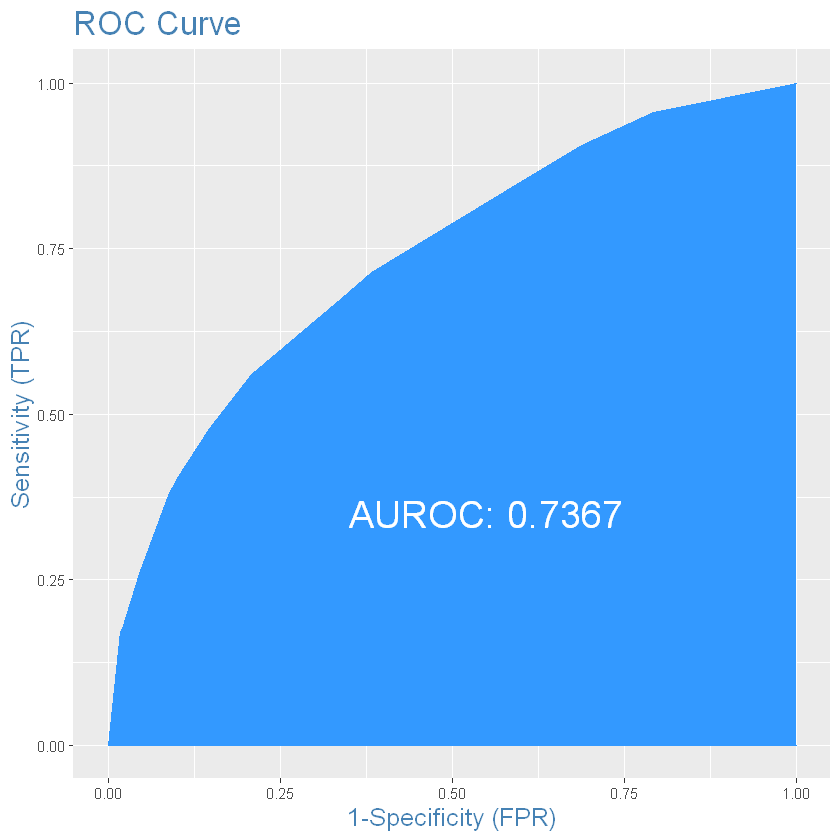

In [128]:
plotROC(test_results$deposit, test_results$PartyPredicted)

Розділимо результати прогнозування на класи:

In [130]:
test_results$PartyPredicted_Class <- ifelse(test_results$PartyPredicted > optCutOff, 1, 0)

Confusion matrix:

In [132]:
cm <- caret::confusionMatrix(factor(test_results$deposit), 
                             factor(test_results$PartyPredicted_Class), 
                             positive = "1")
cm

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1614  424
         1  823 1045
                                          
               Accuracy : 0.6807          
                 95% CI : (0.6659, 0.6954)
    No Information Rate : 0.6239          
    P-Value [Acc > NIR] : 6.871e-14       
                                          
                  Kappa : 0.3545          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.7114          
            Specificity : 0.6623          
         Pos Pred Value : 0.5594          
         Neg Pred Value : 0.7920          
             Prevalence : 0.3761          
         Detection Rate : 0.2675          
   Detection Prevalence : 0.4782          
      Balanced Accuracy : 0.6868          
                                          
       'Positive' Class : 1               
                        

Оцінимо збалансовану точність класифікації:

In [136]:
BAcc # value for previous model

[1] 0.6755507

In [140]:
BAcc1 <- cm$byClass[["Balanced Accuracy"]]
BAcc1
# Wow, its increased. Looks better

[1] 0.686829

---

# 8. Desision Tree with c50

Скористаємося алгоритмом `C50` для побудови дерева рішень.
Для початку потрібно виіхдний показник перетворити у категоріальний (`factor`):

In [141]:
train_data$deposit <- factor(train_data$deposit, levels = c(0,1))
test_data$deposit <- factor(test_data$deposit, levels = c(0,1))

Побудуємо модель:

In [169]:
#install.packages("C50")
library(C50)
c5_model <- C5.0(deposit ~ ., 
                 data = train_data)

Переглянемо модель:

In [170]:
summary(c5_model)
# its hard to check the nodes


Call:
C5.0.formula(formula = deposit ~ ., data = train_data)


C5.0 [Release 2.07 GPL Edition]  	Thu Jun 10 18:11:09 2021
-------------------------------

Class specified by attribute `outcome'

Read 7256 cases (18 attributes) from undefined.data

Decision tree:

poutcoume_success > 0: 1 (715/58)
poutcoume_success <= 0:
:...age > 60: 1 (270/63)
    age <= 60:
    :...pdays > 373:
        :...loan = no: 1 (76/9)
        :   loan = yes:
        :   :...job in {admin.,blue-collar,entrepreneur,housemaid,management,
        :       :       retired,self-employed,student,technician,
        :       :       unknown}: 0 (5)
        :       job in {services,unemployed}: 1 (3)
        pdays <= 373:
        :...contact = unknown:
            :...poutcome = success: 0 (0)
            :   poutcome in {failure,other}: 1 (2)
            :   poutcome = unknown:
            :   :...month in [oct-dec]: 1 (21/3)
            :       month in [jan-sep]:
            :       :...month in [jan-apr]: 1 (6/1)
 

Здійснимо прогноз значень:

In [171]:
train_results$C5Predicted <- predict(c5_model, train_data)
test_results$C5Predicted <- predict(c5_model, test_data)

ROC-крива та AUROC:

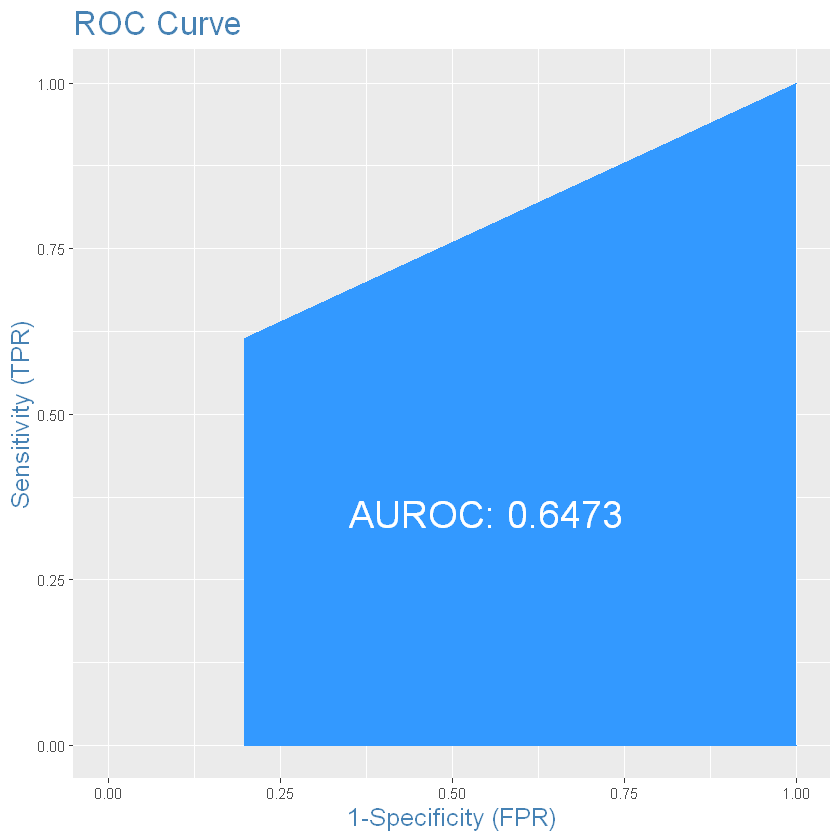

In [172]:
plotROC(as.numeric(test_results$deposit), as.numeric(test_results$C5Predicted))
# you can see that current algorithm is not very good for this data, partykit is much better

Confusion Matrix:

In [173]:
cm <- caret::confusionMatrix(factor(test_results$deposit), 
                             test_results$C5Predicted, 
                             positive = "1")
cm

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1634  404
         1  720 1148
                                          
               Accuracy : 0.7122          
                 95% CI : (0.6978, 0.7264)
    No Information Rate : 0.6027          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4193          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.7397          
            Specificity : 0.6941          
         Pos Pred Value : 0.6146          
         Neg Pred Value : 0.8018          
             Prevalence : 0.3973          
         Detection Rate : 0.2939          
   Detection Prevalence : 0.4782          
      Balanced Accuracy : 0.7169          
                                          
       'Positive' Class : 1               
                        

Збалансована точність моделі:

In [174]:
BAcc # rpart
BAcc1 # partykit

[1] 0.6755507

[1] 0.686829

In [175]:
BAcc2 <- cm$byClass[["Balanced Accuracy"]]
BAcc2
# but balanced accuracy is the best. So this model better classify both good and bad events

[1] 0.7169142

---

# 10. RandomForest

Our next step is testing gradient boosting with `random forest` algorithm.

# 10.1. Default `random forest`

You can use `random forest` with default or special training parameters. 

In [177]:
#install.packages("randomForest")
library(randomForest)

rf_model <- randomForest(deposit ~ ., 
                         data=train_data, 
                         ntree=100, 
                         mtry=2, 
                         importance=TRUE) #Should importance of predictors be assessed?

`ntree` - Number of trees to grow. This should not be set to too small a number, to ensure that every input row gets predicted at least a few times.

`mtry` - Number of variables randomly sampled as candidates at each split.

In [182]:
rf_model


Call:
 randomForest(formula = deposit ~ ., data = train_data, ntree = 100,      mtry = 2, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 2

        OOB estimate of  error rate: 29.07%
Confusion matrix:
     0    1 class.error
0 3285  550   0.1434159
1 1559 1862   0.4557147

Можемо провести аналіз важливості параметрів у залежності від критерію `зменшення точності` або `зменшення джині`:

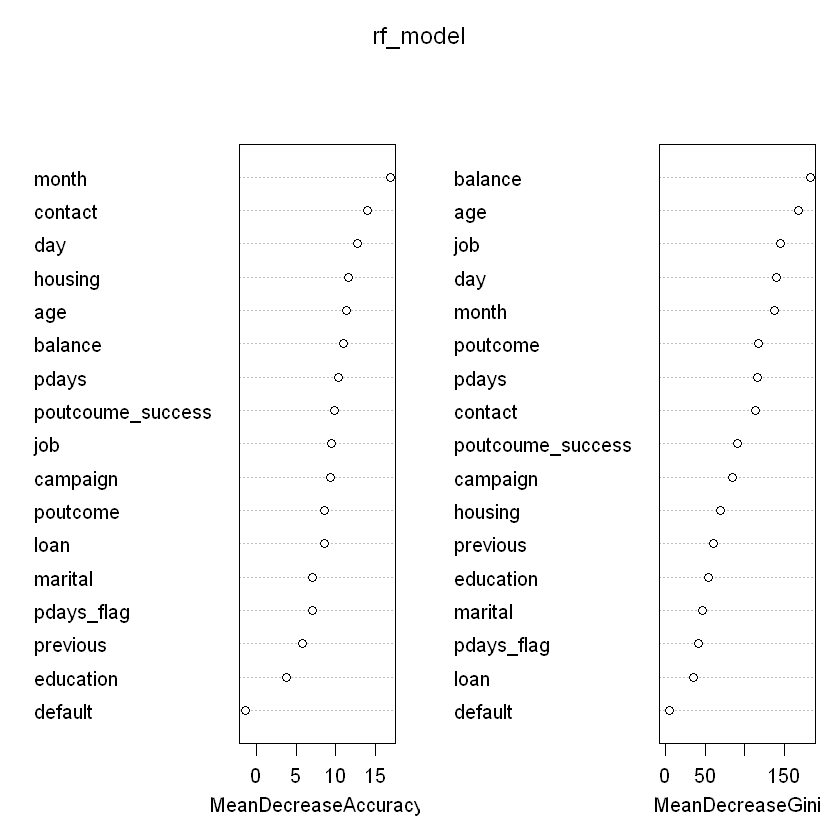

In [181]:
varImpPlot(rf_model)

- [x] `MeanDecreaseAccuracy`: gives a rough estimate of the loss in prediction performance when that particular variable is omitted from the training set. Caveat: if two variables are somewhat redundant, then omitting one of them may not lead to massive gains in prediction performance, but would make the second variable more important.

- [x] `MeanDecreaseGini`: GINI is a measure of node impurity. Think of it like this, if you use this feature to split the data, how pure will the nodes be? Highest purity means that each node contains only elements of a single class. Assessing the decrease in GINI when that feature is omitted leads to an understanding of how important that feature is to split the data correctly.

In [184]:
train_results$RF <- predict(rf_model, train_data)
test_results$RF <- predict(rf_model, test_data)

ROC-крива та AUROC:

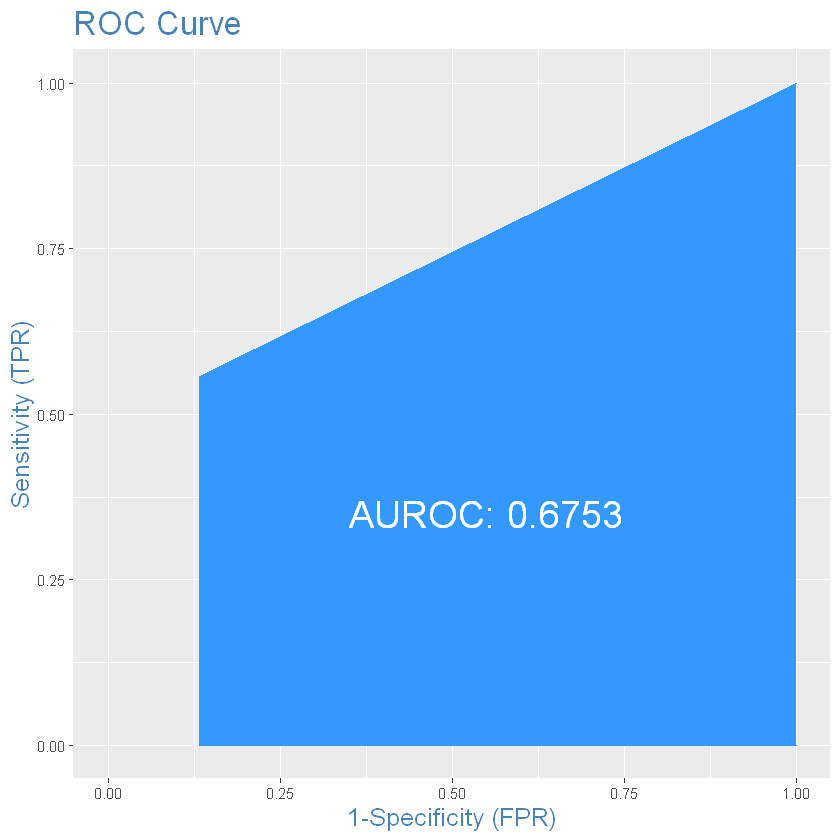

In [186]:
plotROC(as.numeric(test_results$deposit), as.numeric(test_results$RF))

In [190]:
# Balanced accuracy is much better the before!
cm <- caret::confusionMatrix(factor(test_results$deposit), 
                             test_results$RF, 
                             positive = "1")
cm

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1768  270
         1  828 1040
                                         
               Accuracy : 0.7189         
                 95% CI : (0.7045, 0.733)
    No Information Rate : 0.6646         
    P-Value [Acc > NIR] : 1.754e-13      
                                         
                  Kappa : 0.4296         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.7939         
            Specificity : 0.6810         
         Pos Pred Value : 0.5567         
         Neg Pred Value : 0.8675         
             Prevalence : 0.3354         
         Detection Rate : 0.2663         
   Detection Prevalence : 0.4782         
      Balanced Accuracy : 0.7375         
                                         
       'Positive' Class : 1              
                                         

---

# 11. xgBoost

Our next step is testing gradient boosting with `xgboost` algorithm.

In [189]:
#install.packages("xgboost")
library(xgboost)

For complex algorithm like `random forest` or `xgboost` model training

---

# 12. lightgbm 

---